In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.dt_vnc_rnn.input_functions import InputFunction
from src.dt_vnc_rnn.noise_functions import NoiseFunction

In [3]:
inputF = InputFunction(
    input_type="constant",
    num_neurons=4,
    num_timesteps=1000,
    dt=1e-3,
    batch_size=2,
    store_full=False,
    # store_full=True,
    amplitude=[1.13, -0.5, 0.3, 0.8],
)

In [4]:
inps = inputF.get_full_input_data()
inps.shape

(1000, 2, 4)

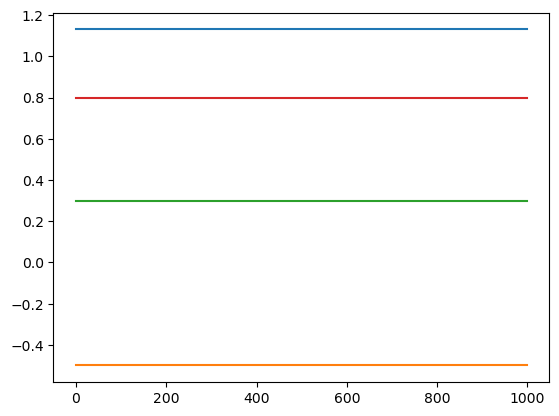

In [5]:
plt.plot(inps[:, 0, :])
plt.show()

In [6]:
inputF = InputFunction(
    input_type="step",
    num_neurons=4,
    num_timesteps=1000,
    dt=1e-3,
    batch_size=2,
    store_full=False,
    # store_full=True,
    amplitude_before=0,
    amplitude_after=[1.13, 0.1, 0.12, 0.13],
    step_time=0.1,
)

In [7]:
print(inputF._input_data.shape)
inps = inputF.get_full_input_data()
inps.shape

(1000, 4)


(1000, 2, 4)

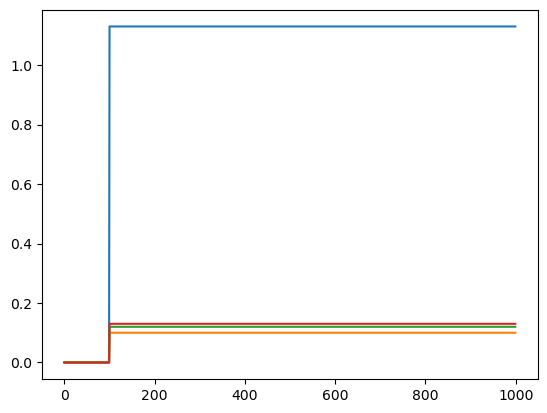

In [8]:
plt.plot(inps[:, 0, :])
plt.show()

In [27]:
noiseF = NoiseFunction(
    # noise_type="gaussian",
    noise_type="colored_noise",
    num_neurons=4,
    num_timesteps=1000,
    dt=1e-3,
    batch_size=2,
    precompute=False,
    # precompute=True,
    random_seed=11,
    std=[1, 0.5, 0.25, 0.125],
    correlation_time=10,
)

In [28]:
if noiseF._noise_data is None:
    print("None")
else:
    print(noiseF._noise_data.shape)
print(noiseF.get(1).shape)

None
(2, 4)


(1000, 2, 4)


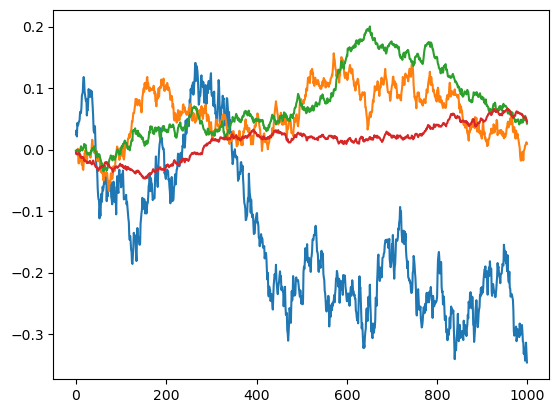

In [31]:
noise = noiseF.get_full_noise_data()
print(noise.shape)
plt.plot(noise[:, 0, :])
plt.show()

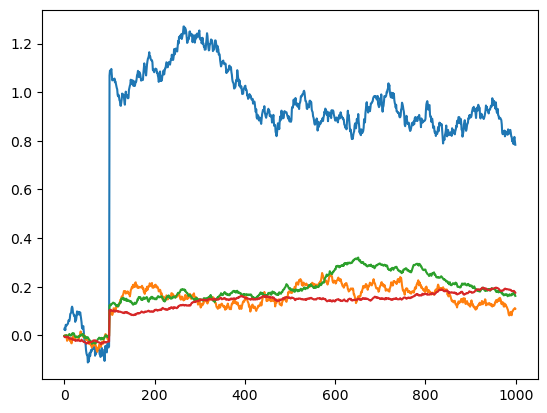

In [32]:
plt.plot(inps[:, 0, :] + noise[:, 0, :])
plt.show()